In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
all_df = pd.read_csv('fifa19data.csv', index_col = 0)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null 

In [2]:
selected_columns = pd.Series(['ID', 'Name', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Weight', 'Height', 'Position', 'Nationality', 'Club'])
print(selected_columns)

0              ID
1            Name
2             Age
3         Overall
4       Potential
5           Value
6            Wage
7          Weight
8          Height
9        Position
10    Nationality
11           Club
dtype: object


In [3]:
sel_df = all_df.loc[ :, selected_columns]
sel_df.head(10)

,ID,Name,Age,Overall,Potential,Value,Wage,Weight,Height,Position,Nationality,Club
0,158023,L. Messi,31,94,94,€110.5M,€565K,159lbs,5'7,RF,Argentina,FC Barcelona
1,20801,Cristiano Ronaldo,33,94,94,€77M,€405K,183lbs,6'2,ST,Portugal,Juventus
2,190871,Neymar Jr,26,92,93,€118.5M,€290K,150lbs,5'9,LW,Brazil,Paris Saint-Germain
3,193080,De Gea,27,91,93,€72M,€260K,168lbs,6'4,GK,Spain,Manchester United
4,192985,K. De Bruyne,27,91,92,€102M,€355K,154lbs,5'11,RCM,Belgium,Manchester City
5,183277,E. Hazard,27,91,91,€93M,€340K,163lbs,5'8,LF,Belgium,Chelsea
6,177003,L. Modrić,32,91,91,€67M,€420K,146lbs,5'8,RCM,Croatia,Real Madrid
7,176580,L. Suárez,31,91,91,€80M,€455K,190lbs,6'0,RS,Uruguay,FC Barcelona
8,155862,Sergio Ramos,32,91,91,€51M,€380K,181lbs,6'0,RCB,Spain,Real Madrid
9,200389,J. Oblak,25,90,93,€68M,€94K,192lbs,6'2,GK,Slovenia,Atlético Madrid


In [4]:
sel_df.iloc[ :, 2:13].describe()

,Age,Overall,Potential
count,18207.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299
std,4.669943,6.908930,6.136496
min,16.000000,46.000000,48.000000
25%,21.000000,62.000000,67.000000
50%,25.000000,66.000000,71.000000
75%,28.000000,71.000000,75.000000
max,45.000000,94.000000,95.000000


In [5]:
sel_df.describe()

,ID,Age,Overall,Potential
count,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299
std,29965.244204,4.669943,6.908930,6.136496
min,16.000000,16.000000,46.000000,48.000000
25%,200315.500000,21.000000,62.000000,67.000000
50%,221759.000000,25.000000,66.000000,71.000000
75%,236529.500000,28.000000,71.000000,75.000000
max,246620.000000,45.000000,94.000000,95.000000


In [6]:
sel_df.loc[13236, :]

ID                 177971
Name           J. McNulty
Age                    33
Overall                62
Potential              62
Value               €120K
Wage                  €1K
Weight                NaN
Height                NaN
Position              NaN
Nationality      Scotland
Club             Rochdale
Name: 13236, dtype: object

In [7]:
i = 0;
while i <= 9:
    half_str = str(i) +".5"
    last_str = str(i)
    i += 1
    sel_df.Value = sel_df.Value.replace(half_str, last_str, regex=True)
sel_df.Value = sel_df.Value.replace('[€,.]', '', regex=True).replace('[M]', '000000', regex=True).replace('[K]', '000', regex=True)
sel_df.Value = sel_df.Value.astype(int)
sel_df.head(10)
#sns.boxplot(x=Values_per_M, data=Values_per_M, width=0.5, color='lightgrey', orient='H')

,ID,Name,Age,Overall,Potential,Value,Wage,Weight,Height,Position,Nationality,Club
0,158023,L. Messi,31,94,94,110000000,€565K,159lbs,5'7,RF,Argentina,FC Barcelona
1,20801,Cristiano Ronaldo,33,94,94,77000000,€405K,183lbs,6'2,ST,Portugal,Juventus
2,190871,Neymar Jr,26,92,93,118000000,€290K,150lbs,5'9,LW,Brazil,Paris Saint-Germain
3,193080,De Gea,27,91,93,72000000,€260K,168lbs,6'4,GK,Spain,Manchester United
4,192985,K. De Bruyne,27,91,92,102000000,€355K,154lbs,5'11,RCM,Belgium,Manchester City
5,183277,E. Hazard,27,91,91,93000000,€340K,163lbs,5'8,LF,Belgium,Chelsea
6,177003,L. Modrić,32,91,91,67000000,€420K,146lbs,5'8,RCM,Croatia,Real Madrid
7,176580,L. Suárez,31,91,91,80000000,€455K,190lbs,6'0,RS,Uruguay,FC Barcelona
8,155862,Sergio Ramos,32,91,91,51000000,€380K,181lbs,6'0,RCB,Spain,Real Madrid
9,200389,J. Oblak,25,90,93,68000000,€94K,192lbs,6'2,GK,Slovenia,Atlético Madrid


In [8]:
#sel_df.Value = sel_df.Value.astype(str)
#halfy_sel_df = sel_df[sel_df['Value'].str.contains('.5', regex=False)]
#halfy_sel_df.Value = halfy_sel_df.replace('[€,.]', '', regex=True).replace('[M]', '000000', regex=True).replace('[K]', '000', regex=True)
#halfy_sel_df.Value = halfy_sel_df.Value.astype(int)
#halfy_sel_df.head(10)

In [9]:
sel_df.Value = sel_df.Value.map(lambda p: p / 1000000)
sel_df.head(10)

,ID,Name,Age,Overall,Potential,Value,Wage,Weight,Height,Position,Nationality,Club
0,158023,L. Messi,31,94,94,110.0,€565K,159lbs,5'7,RF,Argentina,FC Barcelona
1,20801,Cristiano Ronaldo,33,94,94,77.0,€405K,183lbs,6'2,ST,Portugal,Juventus
2,190871,Neymar Jr,26,92,93,118.0,€290K,150lbs,5'9,LW,Brazil,Paris Saint-Germain
3,193080,De Gea,27,91,93,72.0,€260K,168lbs,6'4,GK,Spain,Manchester United
4,192985,K. De Bruyne,27,91,92,102.0,€355K,154lbs,5'11,RCM,Belgium,Manchester City
5,183277,E. Hazard,27,91,91,93.0,€340K,163lbs,5'8,LF,Belgium,Chelsea
6,177003,L. Modrić,32,91,91,67.0,€420K,146lbs,5'8,RCM,Croatia,Real Madrid
7,176580,L. Suárez,31,91,91,80.0,€455K,190lbs,6'0,RS,Uruguay,FC Barcelona
8,155862,Sergio Ramos,32,91,91,51.0,€380K,181lbs,6'0,RCB,Spain,Real Madrid
9,200389,J. Oblak,25,90,93,68.0,€94K,192lbs,6'2,GK,Slovenia,Atlético Madrid


In [10]:
sel_df.Wage = sel_df.Wage.replace('[€,]', '', regex=True).replace('[M]', '000000', regex=True).replace('[K]', '000', regex=True)
sel_df.Wage = sel_df.Wage.astype(int)
sel_df.head(10)
#sns.boxplot(x=Wages_per_K, data=Wages_per_K, width=0.5, color='lightgrey', orient='H')

,ID,Name,Age,Overall,Potential,Value,Wage,Weight,Height,Position,Nationality,Club
0,158023,L. Messi,31,94,94,110.0,565000,159lbs,5'7,RF,Argentina,FC Barcelona
1,20801,Cristiano Ronaldo,33,94,94,77.0,405000,183lbs,6'2,ST,Portugal,Juventus
2,190871,Neymar Jr,26,92,93,118.0,290000,150lbs,5'9,LW,Brazil,Paris Saint-Germain
3,193080,De Gea,27,91,93,72.0,260000,168lbs,6'4,GK,Spain,Manchester United
4,192985,K. De Bruyne,27,91,92,102.0,355000,154lbs,5'11,RCM,Belgium,Manchester City
5,183277,E. Hazard,27,91,91,93.0,340000,163lbs,5'8,LF,Belgium,Chelsea
6,177003,L. Modrić,32,91,91,67.0,420000,146lbs,5'8,RCM,Croatia,Real Madrid
7,176580,L. Suárez,31,91,91,80.0,455000,190lbs,6'0,RS,Uruguay,FC Barcelona
8,155862,Sergio Ramos,32,91,91,51.0,380000,181lbs,6'0,RCB,Spain,Real Madrid
9,200389,J. Oblak,25,90,93,68.0,94000,192lbs,6'2,GK,Slovenia,Atlético Madrid


In [11]:
sel_df.Wage = sel_df.Wage.map(lambda p: p / 1000)
sel_df.head(10)

,ID,Name,Age,Overall,Potential,Value,Wage,Weight,Height,Position,Nationality,Club
0,158023,L. Messi,31,94,94,110.0,565.0,159lbs,5'7,RF,Argentina,FC Barcelona
1,20801,Cristiano Ronaldo,33,94,94,77.0,405.0,183lbs,6'2,ST,Portugal,Juventus
2,190871,Neymar Jr,26,92,93,118.0,290.0,150lbs,5'9,LW,Brazil,Paris Saint-Germain
3,193080,De Gea,27,91,93,72.0,260.0,168lbs,6'4,GK,Spain,Manchester United
4,192985,K. De Bruyne,27,91,92,102.0,355.0,154lbs,5'11,RCM,Belgium,Manchester City
5,183277,E. Hazard,27,91,91,93.0,340.0,163lbs,5'8,LF,Belgium,Chelsea
6,177003,L. Modrić,32,91,91,67.0,420.0,146lbs,5'8,RCM,Croatia,Real Madrid
7,176580,L. Suárez,31,91,91,80.0,455.0,190lbs,6'0,RS,Uruguay,FC Barcelona
8,155862,Sergio Ramos,32,91,91,51.0,380.0,181lbs,6'0,RCB,Spain,Real Madrid
9,200389,J. Oblak,25,90,93,68.0,94.0,192lbs,6'2,GK,Slovenia,Atlético Madrid


In [12]:
#sel_df.Weight = sel_df.Weight.fillna("0")
sel_df.Weight = sel_df.Weight.replace("lbs", '', regex=True)
sel_df.Weight = sel_df.Weight.astype(float)
sel_df.Weight = sel_df.Weight * 0.45359237
sel_df.Weight = sel_df.Weight.round()
sel_df.Weight = pd.to_numeric(sel_df["Weight"])
#sel_df.Weight = sel_df.Weight.astype(int)
sel_df.head(10)

,ID,Name,Age,Overall,Potential,Value,Wage,Weight,Height,Position,Nationality,Club
0,158023,L. Messi,31,94,94,110.0,565.0,72.0,5'7,RF,Argentina,FC Barcelona
1,20801,Cristiano Ronaldo,33,94,94,77.0,405.0,83.0,6'2,ST,Portugal,Juventus
2,190871,Neymar Jr,26,92,93,118.0,290.0,68.0,5'9,LW,Brazil,Paris Saint-Germain
3,193080,De Gea,27,91,93,72.0,260.0,76.0,6'4,GK,Spain,Manchester United
4,192985,K. De Bruyne,27,91,92,102.0,355.0,70.0,5'11,RCM,Belgium,Manchester City
5,183277,E. Hazard,27,91,91,93.0,340.0,74.0,5'8,LF,Belgium,Chelsea
6,177003,L. Modrić,32,91,91,67.0,420.0,66.0,5'8,RCM,Croatia,Real Madrid
7,176580,L. Suárez,31,91,91,80.0,455.0,86.0,6'0,RS,Uruguay,FC Barcelona
8,155862,Sergio Ramos,32,91,91,51.0,380.0,82.0,6'0,RCB,Spain,Real Madrid
9,200389,J. Oblak,25,90,93,68.0,94.0,87.0,6'2,GK,Slovenia,Atlético Madrid


In [13]:
def Feet(row):
    row.feet = row.Height[0]
    return row
def Inch(row):
    row.inch = row.Height[2:]
    return row

#sel_df.Height = sel_df.Height.fillna("0")
sel_df.Height = sel_df.Height.astype(str)
sel_df['feet'] = sel_df.Height
sel_df['inch'] = sel_df.Height
sel_df['Height_inch'] = sel_df.Height
sel_df = sel_df.apply(Feet, axis='columns')
sel_df = sel_df.apply(Inch, axis='columns')
#sel_df.inch = sel_df.inch.astype(float)
#sel_df.feet = sel_df.feet.astype(float)
sel_df.inch = pd.to_numeric(sel_df['inch'], errors='coerce')
sel_df.feet = pd.to_numeric(sel_df['feet'], errors='coerce')
sel_df.Height_inch = (sel_df.feet*12) + sel_df.inch
sel_df.Height = sel_df.Height_inch * 2.54
sel_df.Height = sel_df.Height.round()#.fillna(0).astype(int)
sel_df = sel_df.drop(sel_df.columns[[12, 13, 14]], axis=1)
sel_df.head(10)

,ID,Name,Age,Overall,Potential,Value,Wage,Weight,Height,Position,Nationality,Club
0,158023,L. Messi,31,94,94,110.0,565.0,72.0,170.0,RF,Argentina,FC Barcelona
1,20801,Cristiano Ronaldo,33,94,94,77.0,405.0,83.0,188.0,ST,Portugal,Juventus
2,190871,Neymar Jr,26,92,93,118.0,290.0,68.0,175.0,LW,Brazil,Paris Saint-Germain
3,193080,De Gea,27,91,93,72.0,260.0,76.0,193.0,GK,Spain,Manchester United
4,192985,K. De Bruyne,27,91,92,102.0,355.0,70.0,180.0,RCM,Belgium,Manchester City
5,183277,E. Hazard,27,91,91,93.0,340.0,74.0,173.0,LF,Belgium,Chelsea
6,177003,L. Modrić,32,91,91,67.0,420.0,66.0,173.0,RCM,Croatia,Real Madrid
7,176580,L. Suárez,31,91,91,80.0,455.0,86.0,183.0,RS,Uruguay,FC Barcelona
8,155862,Sergio Ramos,32,91,91,51.0,380.0,82.0,183.0,RCB,Spain,Real Madrid
9,200389,J. Oblak,25,90,93,68.0,94.0,87.0,188.0,GK,Slovenia,Atlético Madrid


In [14]:
sel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 12 columns):
ID             18207 non-null int64
Name           18207 non-null object
Age            18207 non-null int64
Overall        18207 non-null int64
Potential      18207 non-null int64
Value          18207 non-null float64
Wage           18207 non-null float64
Weight         18159 non-null float64
Height         18159 non-null float64
Position       18147 non-null object
Nationality    18207 non-null object
Club           17966 non-null object
dtypes: float64(4), int64(4), object(4)
memory usage: 2.4+ MB


In [15]:
sel_df.describe()

,ID,Age,Overall,Potential,Value,Wage,Weight,Height
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,6.333849,9.731312,75.289003,181.179911
std,29965.244204,4.669943,6.908930,6.136496,11.086936,21.999290,7.075511,6.691885
min,16.000000,16.000000,46.000000,48.000000,0.000000,0.000000,50.000000,155.000000
25%,200315.500000,21.000000,62.000000,67.000000,0.090000,1.000000,70.000000,175.000000
50%,221759.000000,25.000000,66.000000,71.000000,0.450000,3.000000,75.000000,180.000000
75%,236529.500000,28.000000,71.000000,75.000000,9.000000,9.000000,80.000000,185.000000
max,246620.000000,45.000000,94.000000,95.000000,118.000000,565.000000,110.000000,206.000000


In [16]:
sel_col_for_corr = pd.Series(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Weight', 'Height'])
forcorr_df = sel_df.loc[ :, sel_col_for_corr]

sel_df_top = sel_df.sort_values(by='Overall', ascending=False).iloc[:50,:]
sel_df_bottom = sel_df.sort_values(by='Overall', ascending=True).iloc[:50,:]

forcorr_df_top = sel_df_top.loc[ :, sel_col_for_corr]
forcorr_df_bottom = sel_df_bottom.loc[ :, sel_col_for_corr]

sel_df_top.describe()

,ID,Age,Overall,Potential,Value,Wage,Weight,Height
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,176433.620000,28.820000,88.940000,89.740000,60.600000,245.120000,79.000000,182.12000
std,38412.837081,3.354497,1.671001,2.136276,22.087026,102.946318,8.637838,7.93247
min,1179.000000,19.000000,87.000000,87.000000,4.000000,77.000000,59.000000,163.00000
25%,168569.250000,26.000000,88.000000,88.000000,46.000000,161.250000,73.000000,175.00000
50%,182899.000000,29.000000,88.500000,89.000000,60.000000,240.000000,79.000000,183.00000
75%,192865.000000,31.000000,90.000000,91.000000,73.000000,311.250000,85.000000,188.00000
max,231747.000000,40.000000,94.000000,95.000000,118.000000,565.000000,96.000000,198.00000


In [17]:
sel_df_bottom.describe()

,ID,Age,Overall,Potential,Value,Wage,Weight,Height
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,239264.740000,18.860000,47.560000,62.98000,0.052400,1.020000,72.000000,179.840000
std,27104.017178,4.365963,0.540597,4.93422,0.012382,0.141421,6.249898,6.099046
min,53748.000000,16.000000,46.000000,48.00000,0.000000,1.000000,61.000000,168.000000
25%,241916.750000,17.000000,47.000000,60.00000,0.050000,1.000000,67.000000,175.750000
50%,243888.000000,18.000000,48.000000,64.00000,0.060000,1.000000,71.500000,178.000000
75%,245569.750000,19.000000,48.000000,66.00000,0.060000,1.000000,75.750000,185.000000
max,246600.000000,44.000000,48.000000,72.00000,0.070000,2.000000,86.000000,196.000000


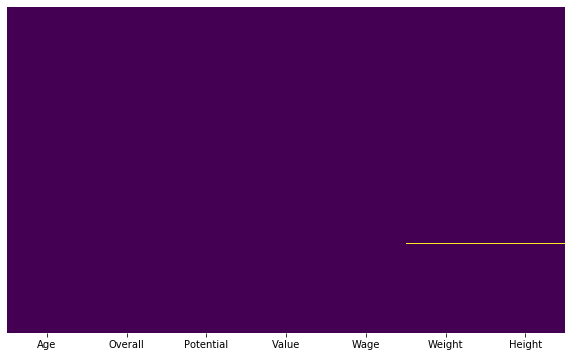

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(forcorr_df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

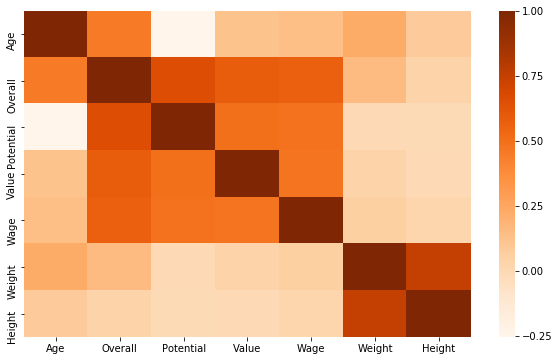

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(forcorr_df.corr(),cmap='Oranges',annot=False) 

In [20]:
def box(df, df_top, df_bottom):
    l = df.iloc[ :, [2,3,4,5,6,7,8]].columns.values
    number_of_columns=7
    number_of_rows =3 #(len(l)-1/number_of_columns) * 3
    plt.figure(figsize=(number_of_columns,4*number_of_rows))
    for i in range(0,len(l)):
        plt.subplot(number_of_rows,number_of_columns, i+1)
        sns.set_style('whitegrid')
        sns.boxplot(df[l[i]],color='orange',orient='v')
        plt.subplot(number_of_rows,number_of_columns, i+1+number_of_columns)
        sns.boxplot(df_top[l[i]],color='blue',orient='v')
        plt.subplot(number_of_rows,number_of_columns, i+1+(number_of_columns*2))
        sns.boxplot(df_bottom[l[i]],color='green',orient='v')
        plt.tight_layout()

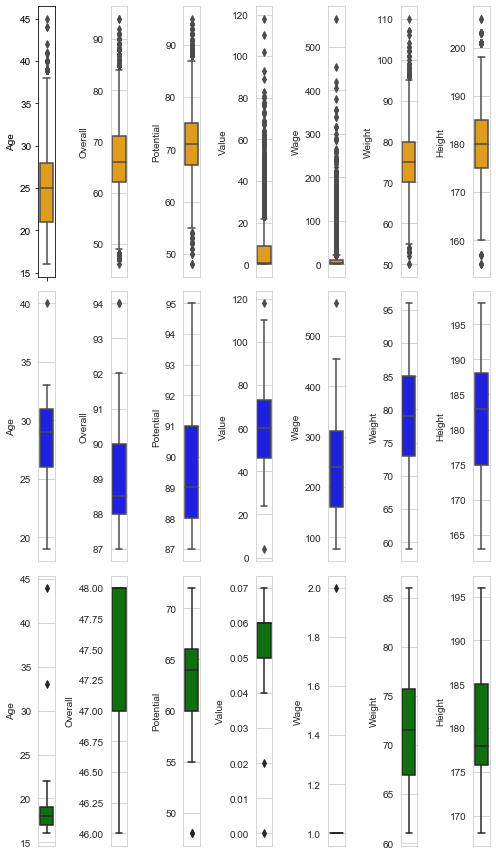

In [21]:
box(sel_df, sel_df_top, sel_df_bottom)

In [22]:
def distribution(df, df_top, df_bottom):
    l = df.iloc[ :, [2,3,4,5,6,7,8]].columns.values
    number_of_columns=7
    number_of_rows =3 #(len(l)-1/number_of_columns) * 3
    plt.figure(figsize=(2*number_of_columns,4*number_of_rows))
    for i in range(0,len(l)):
        plt.subplot(number_of_rows,number_of_columns, i+1)
        sns.set_style('whitegrid')
        sns.distplot(df[l[i]].dropna(),kde=True,color='orange')
        plt.subplot(number_of_rows,number_of_columns, i+1+number_of_columns)
        sns.distplot(df_top[l[i]].dropna(),kde=True,color='blue')
        plt.subplot(number_of_rows,number_of_columns, i+1+(number_of_columns*2))
        sns.distplot(df_bottom[l[i]].dropna(),kde=True,color='green')
        plt.tight_layout()

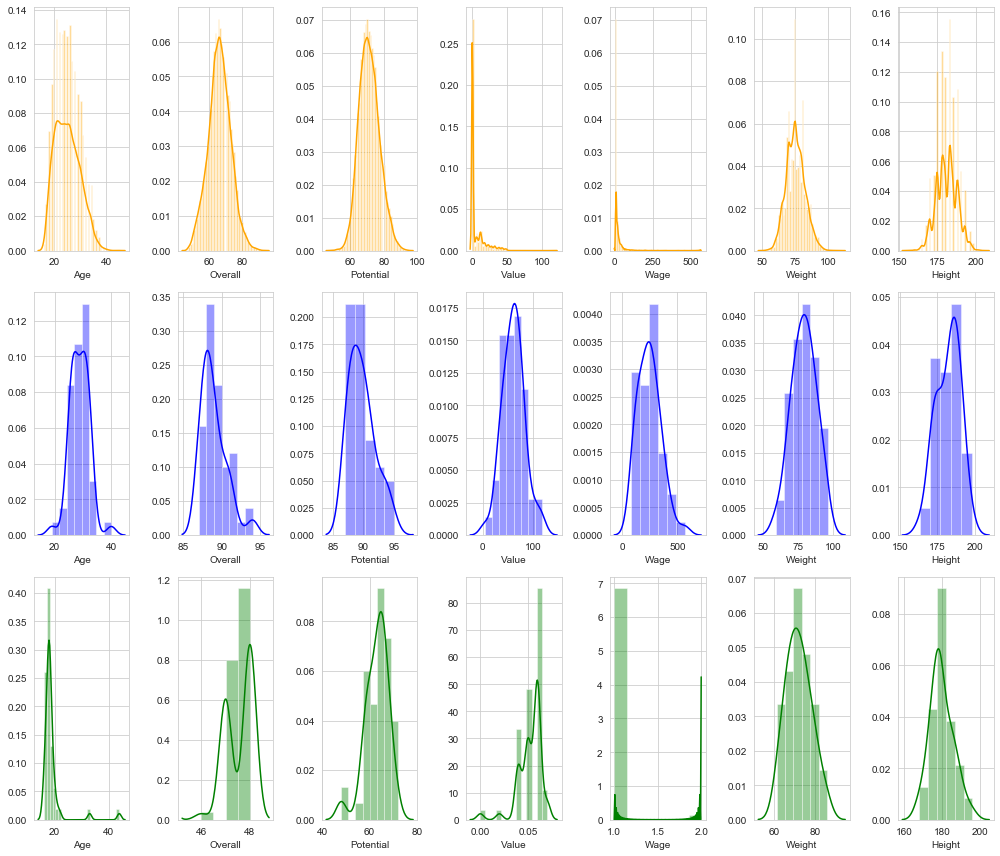

In [23]:
distribution(sel_df, sel_df_top, sel_df_bottom)

In [24]:
def correlation(df):
    k = 7
    cols = df.corr().nlargest(k, 'Value')['Value'].index
    plt.figure(figsize=(10,6))
    sns.heatmap(df[cols].corr(), annot=True, cmap = 'viridis')

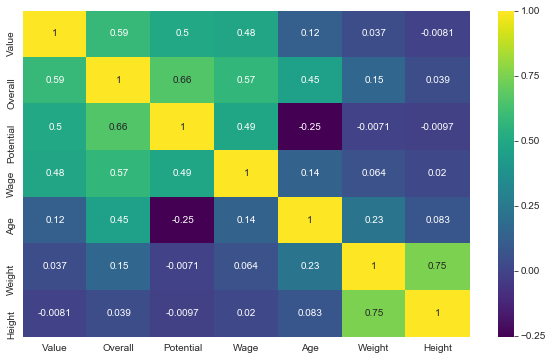

In [25]:
correlation(forcorr_df)

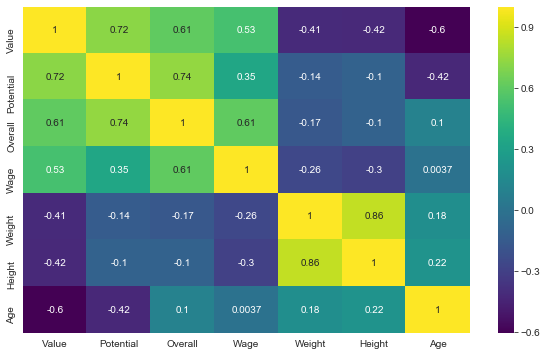

In [26]:
correlation(forcorr_df_top)

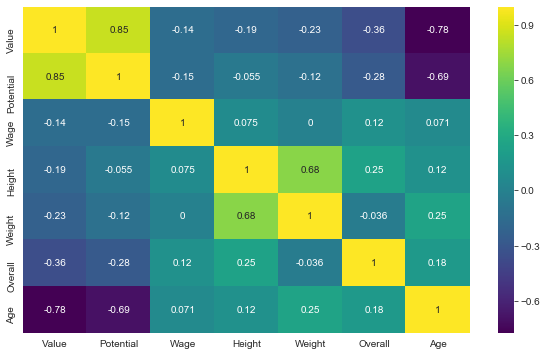

In [27]:
correlation(forcorr_df_bottom)